In [ ]:
#https://wikidocs.net/94748

# PIP Mecab

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 52.1MB/s 
     |████████████████████████████████| 460kB 35.5MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-05-09 10:53:41--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c2:513, ...
Con

# Word Embedding

In [ ]:
import torch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#데이터 로드

train_data = pd.read_csv('/content/drive/MyDrive/DG_CP_F/chatting_log.csv')

print('전체 데이터 개수 :',len(train_data)) # 전체 데이터 개수 출력
print(train_data.isnull().values.any()) #Null 값 확인
# 한글과 공백을 제외하고 모두 제거
mecab = Mecab()
train_data['chatting'] = train_data['chatting'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['chatting'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())
# stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']
train_data['tokenized'] = train_data['chatting'].apply(mecab.morphs)
# train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])# 토근화 및 불용어 제거

X_train = train_data['tokenized'].values
y_train = train_data['label'].values # x, y 값 선언

print(X_train)
# 단어 정수 인코딩 시작
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 

threshold = 0
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
max_len = max(len(l) for l in X_train)
print('채팅의 최대 길이 :',max(len(l) for l in X_train))
print('채팅의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

X_train = pad_sequences(X_train, maxlen = max_len) #패딩(LSTM을 위함) # type numpy
print(X_train)


FileNotFoundError: ignored

#BI-LSTM MODEL

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0100 cost = 0.000720
Epoch: 0200 cost = 0.000306
Epoch: 0300 cost = 0.000175
Epoch: 0400 cost = 0.000116
Epoch: 0500 cost = 0.000083
Epoch: 0600 cost = 0.000063
Epoch: 0700 cost = 0.000050
Epoch: 0800 cost = 0.000040
Epoch: 0900 cost = 0.000033
Epoch: 1000 cost = 0.000028
Epoch: 1100 cost = 0.000024
Epoch: 1200 cost = 0.000021
Epoch: 1300 cost = 0.000018
Epoch: 1400 cost = 0.000016
Epoch: 1500 cost = 0.000014
Epoch: 1600 cost = 0.000013
Epoch: 1700 cost = 0.000011
Epoch: 1800 cost = 0.000010
Epoch: 1900 cost = 0.000009
Epoch: 2000 cost = 0.000008


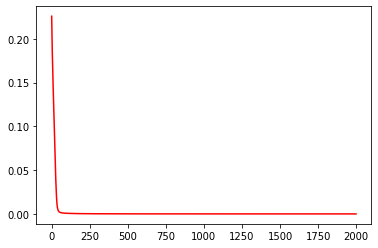

FileNotFoundError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
from google.colab import auth
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import torch.nn.functional as F


# gpu = 'cuda' if torch.cuda.is_available() else 'cpu'
# print(gpu)
# # for reproducibility
# torch.manual_seed(777)
# if gpu == 'cuda':
#     torch.cuda.manual_seed_all(777)
#model sequence
class SingleRNN(nn.Module):

    def __init__(self, input_size, hidden_size, dropout, bidirectional=True):
        super(SingleRNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_direction = int(bidirectional) + 1
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers = 3, dropout=dropout, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(5,1)
        self.softmax = nn.Softmax(dim=-1)
        
        

    def forward(self, input):
        # input shape: batch, seq, dim
        output = input
        rnn_output, self.hidden = self.rnn(output)
        rnn_output = rnn_output[:,-1,:]
        # bi directional 참고 : https://stackoverflow.com/questions/53010465/bidirectional-lstm-output-question-in-pytorch
        fc = self.fc(rnn_output)
        softmax = torch.sigmoid(fc)
        softmax = torch.squeeze(softmax, dim = 1)
        
        return softmax
#시험 데이터 랜덤 생성
train = torch.randn(6,6,1)
TF = torch.zeros(6,1)
      
model = SingleRNN(input_size=1,hidden_size =5 , dropout = 0, bidirectional= False)
output1 = model(train)

optimizer = optim.Adam(model.parameters(), lr=0.01)
best_model_wts = model.state_dict() 
best_acc = 0
best_epoch = 0
criterion = nn.MSELoss()
l_array = []
a_array = []
for epoch in range(2000):
  output = model(train)
  # loss = (torch.abs((output - TF))).mean()
  loss = criterion(output, TF)
      
  loss1 = loss.tolist()
  l_array.append(loss1)

  if (epoch + 1) % 100 == 0:
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
      
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(l_array, 'r')
plt.show()
model_save_name = 'classifierDG.pt'
path = F"/content/drive/My Drive/{model_save_name}" 
torch.save(model.state_dict(), path)

In [ ]:
import torch
lstm = torch.nn.LSTM(input_size=5, hidden_size=3,num_layers = 2, bidirectional=True,batch_first = True)
seq_len, batch, input_size, num_directions = 3, 2, 5, 2
in_data = torch.randint(10, ( batch,seq_len, input_size)).float()
output, (h_n, c_n) = lstm(in_data)
print(output)
print(h_n)
#순방향 last layer
print(h_n[-2,:,:])
#역방향 last layer
print(h_n[-1,:,:])

#  numlayers 에서 정방향 역방향 한페어씩 3개씩 출력됨 0 1 0 1 0 1 순서 마지막 0 1 만 빼서 쓰면 될 듯 

tensor([[[ 0.0756, -0.0637,  0.0454, -0.2013,  0.1927,  0.2713],
         [ 0.1123, -0.0465,  0.0443, -0.1651,  0.1951,  0.2770],
         [ 0.1500,  0.0140,  0.0174, -0.1000,  0.1550,  0.2054]],

        [[ 0.0427, -0.1004,  0.0389, -0.3078, -0.0133,  0.3790],
         [ 0.0682, -0.1235,  0.0071, -0.2266,  0.0719,  0.2861],
         [ 0.0745, -0.1218, -0.0249, -0.1701,  0.0549,  0.2232]]],
       grad_fn=<TransposeBackward0>)
tensor([[[-7.7300e-01, -4.6660e-01, -5.6472e-02],
         [-9.6341e-01, -4.6650e-01, -1.1429e-02]],

        [[-1.0681e-03, -7.6680e-02, -7.0967e-01],
         [-4.7970e-04, -8.3318e-02, -8.5741e-01]],

        [[ 1.5001e-01,  1.3961e-02,  1.7445e-02],
         [ 7.4480e-02, -1.2182e-01, -2.4877e-02]],

        [[-2.0125e-01,  1.9266e-01,  2.7127e-01],
         [-3.0781e-01, -1.3299e-02,  3.7901e-01]]], grad_fn=<StackBackward>)
tensor([[ 0.1500,  0.0140,  0.0174],
        [ 0.0745, -0.1218, -0.0249]], grad_fn=<SliceBackward>)
tensor([[-0.2013,  0.1927,  0.2713],